<a href="https://colab.research.google.com/github/Arman-1994/Experimental-Place/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 450kB 59.3MB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot

In [0]:
# Loading Train and Test Set
(train_x,train_y),(test_x, test_y) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# Priniting Summary of dataset
print("No of records in trainset: ",train_x.shape[0])
print("Dimensions of each image : ",train_x.shape[1],"*",train_x.shape[1])
print("Channels in each image   : ",train_x.shape[3])

No of records in trainset:  50000
Dimensions of each image :  32 * 32
Channels in each image   :  3


In [0]:
print("No of records in testset : ",test_x.shape[0])
print("Dimensions of each image : ",test_x.shape[1],"*",train_x.shape[1])
print("Channels in each image   : ",test_x.shape[3])

No of records in testset :  10000
Dimensions of each image :  32 * 32
Channels in each image   :  3


In [0]:
# Need to be One Hot Encoded
print("No of Classes : ",train_y.shape)

No of Classes :  (50000, 1)


In [0]:
class_names= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

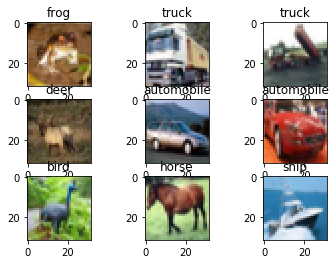

In [0]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(train_x[i])
  plt.title(class_names[train_y[i][0]])


In [0]:
# Understanding the max and min values that an element of train acan take
print("Max value that a image can take ",train_x.max())
print("Min value that a image can take ",train_x.min())

Max value that a image can take  255
Min value that a image can take  0


In [0]:
# Normalising the values as the Neural network works on Normalised values
train_x = train_x / 255
test_x  = test_x   / 255

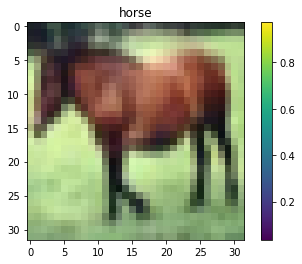

In [0]:
# Note the color bar values lies in range of 0 to 1
image_no = 7
plt.imshow(train_x[image_no])
plt.title( class_names[train_y[image_no][0]] )
plt.colorbar()

In [0]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [0]:
# Note these set of code will result in feature extraction from the image and not respnsible to classify images

model = Sequential()
#block1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
#block2
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
#block3
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
#block4
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
#block5
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
#block6
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

In [0]:
# Responsible for classificatio ( takes data from convo layers flattens in and classifies it)
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [0]:
history = model.fit(train_x,train_y,batch_size=250,epochs=15,validation_split=.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 360s 9ms/sample - loss: 1.7303 - accuracy: 0.3936 - val_loss: 2.8803 - val_accuracy: 0.1902
Epoch 2/15
40000/40000 [==============================] - 358s 9ms/sample - loss: 1.2450 - accuracy: 0.5481 - val_loss: 1.9389 - val_accuracy: 0.3739
Epoch 3/15
40000/40000 [==============================] - 354s 9ms/sample - loss: 1.0515 - accuracy: 0.6229 - val_loss: 1.0520 - val_accuracy: 0.6306
Epoch 4/15
40000/40000 [==============================] - 354s 9ms/sample - loss: 0.9151 - accuracy: 0.6705 - val_loss: 0.8940 - val_accuracy: 0.6842
Epoch 5/15
40000/40000 [==============================] - 353s 9ms/sample - loss: 0.8196 - accuracy: 0.7082 - val_loss: 0.8647 - val_accuracy: 0.6946
Epoch 6/15
40000/40000 [==============================] - 348s 9ms/sample - loss: 0.7480 - accuracy: 0.7358 - val_loss: 0.7786 - val_accuracy: 0.7270
Epoch 7/15
40000/40000 [==========================

In [0]:
summarize_diagnostics(history)

In [0]:
## looking at the score we see that train accuracy is approx 82.17 after 10 epochs while the validate accuracy is approx 79  

In [0]:
model.evaluate(test_x,test_y,batch_size=100,use_multiprocessing=True)

In [0]:
# After evaluting we can see that our Test Accuracy is very similar to that of Validate accuracy idicating that the model is not overfitting.